# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [2]:
file1 = 'data1.pkl'

In [6]:
df = joblib.load('data1.pkl')
df.head(1)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,...,temp_max_lag1,temp_min_lag1,rain(mm)_lag_1,humidity_max(%)_lag_1,humidity_min(%)_lag_1,sunshine(MJ/m2)_lag_1,season,holidays,waiting_time_MA7,boarding_rate(%)
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,...,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,New year,23.2,90.32


In [7]:
df.shape

(2921, 22)

In [19]:
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,...,temp_max_lag1,temp_min_lag1,rain(mm)_lag_1,humidity_max(%)_lag_1,humidity_min(%)_lag_1,sunshine(MJ/m2)_lag_1,season,holidays,waiting_time_MA7,boarding_rate(%)
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,...,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,New year,23.20,90.32
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,...,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,20.20,89.90
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,...,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,22.20,91.87
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,...,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.78,92.71
4,2015-01-05,421,4250,3730,26.2,2214,8663,1,2,2015,...,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.46,87.76


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [47]:
# 숫자형 변수 분석
#column = 'car_cnt'
def num_plot(column, df):
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.boxplot(x=column, data=df)
    plt.subplot(1,2,2)
    sns.histplot(x=column, data=df, kde=True)
    plt.tight_layout()
    plt.show()

In [80]:
# 범주형 변수 분석
def cat_plot(column, df):
    plt.figure(figsize=(8,3))
    sns.countplot(x=column, data=df)
    if (df[column].nunique()>12)|(column=='holidays'):
        plt.xticks(rotation=90)
    plt.show()            

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2921 non-null   datetime64[ns]
 1   car_cnt                2921 non-null   int64         
 2   request_cnt            2921 non-null   int64         
 3   ride_cnt               2921 non-null   int64         
 4   waiting_time           2921 non-null   float64       
 5   fare                   2921 non-null   int64         
 6   distance               2921 non-null   int64         
 7   month                  2921 non-null   category      
 8   week                   2921 non-null   int64         
 9   year                   2921 non-null   int64         
 10  weekday                2921 non-null   category      
 11  target                 2921 non-null   float64       
 12  temp_max_lag1          2921 non-null   float64       
 13  tem

In [61]:
cat_cols = ['month','week','year','weekday','season','holidays'] 
num_cols = [col for col in df.columns if col not in cat_cols]

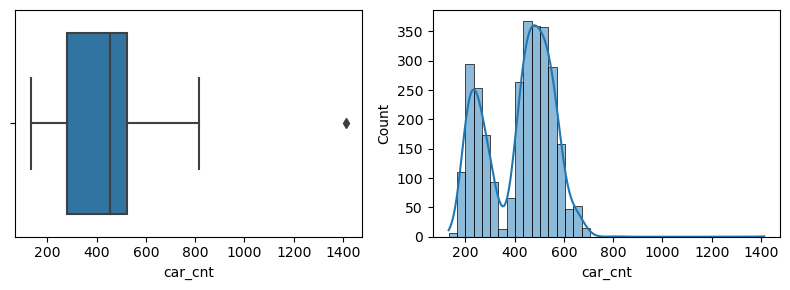

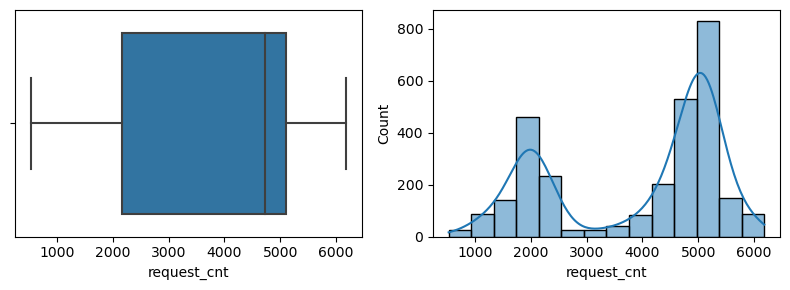

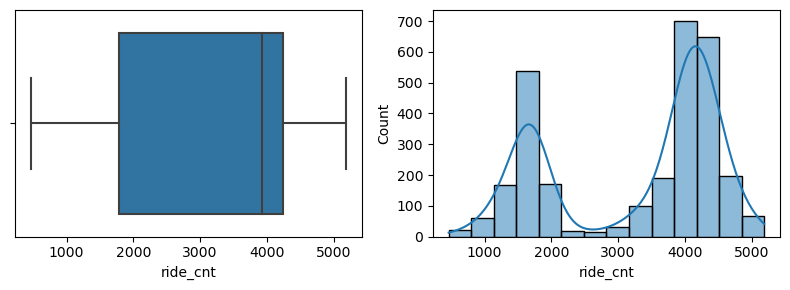

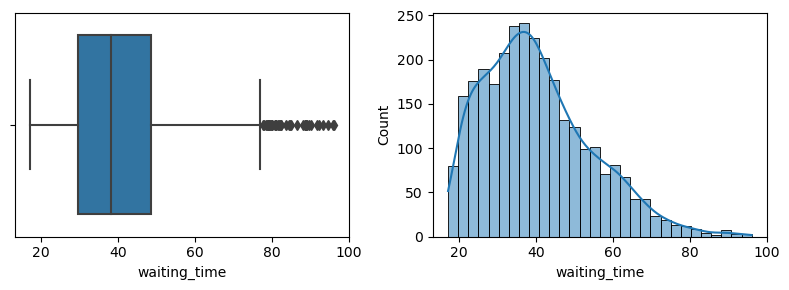

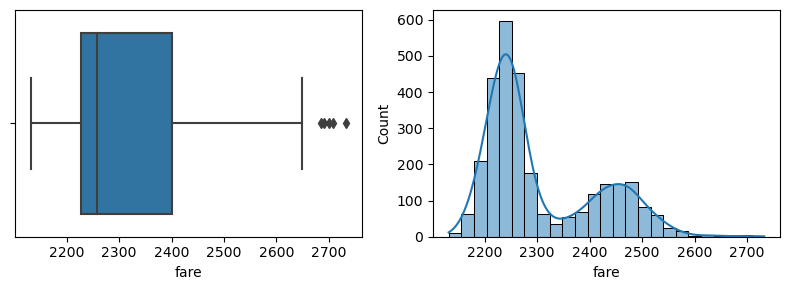

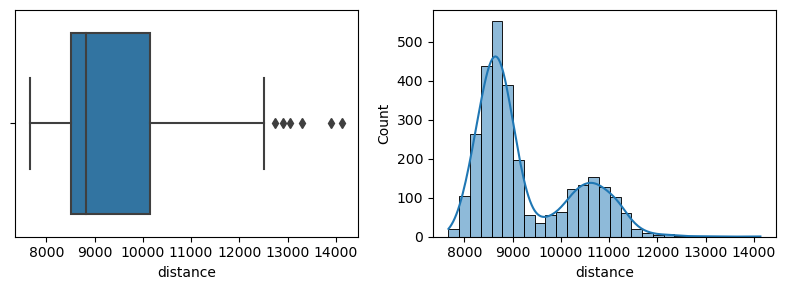

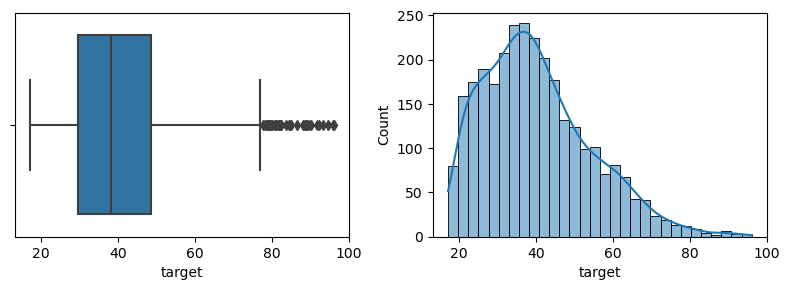

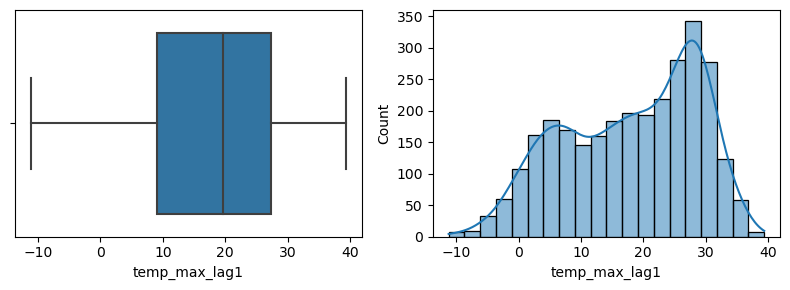

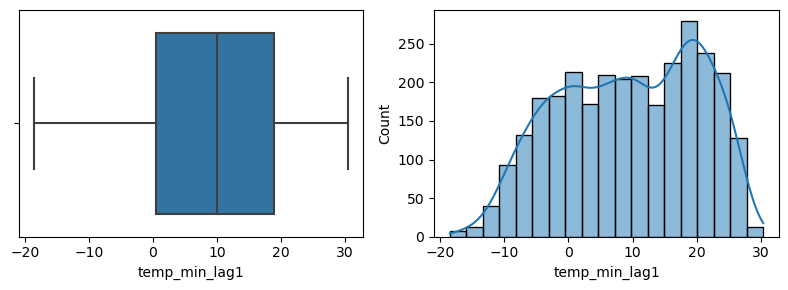

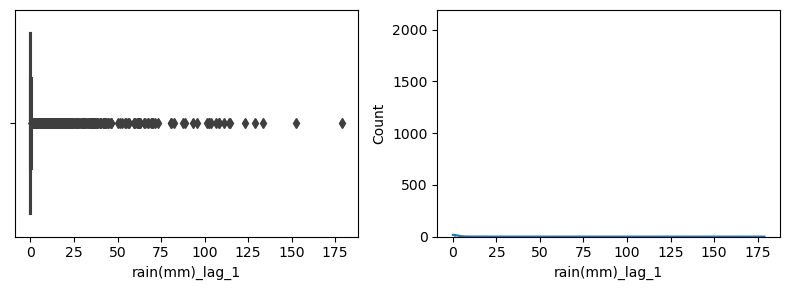

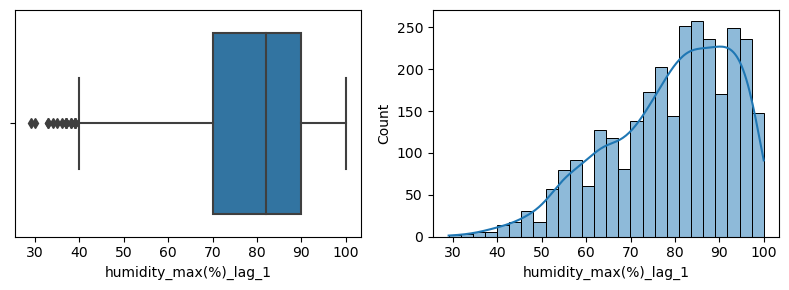

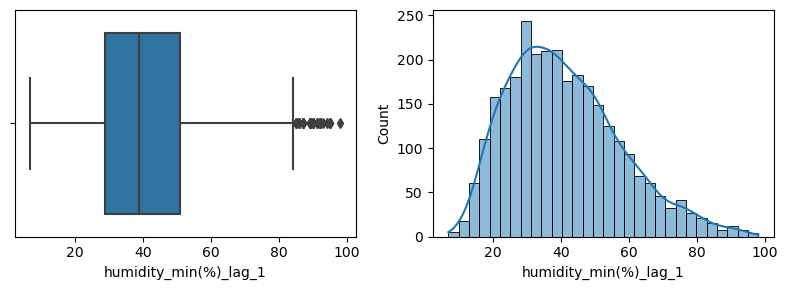

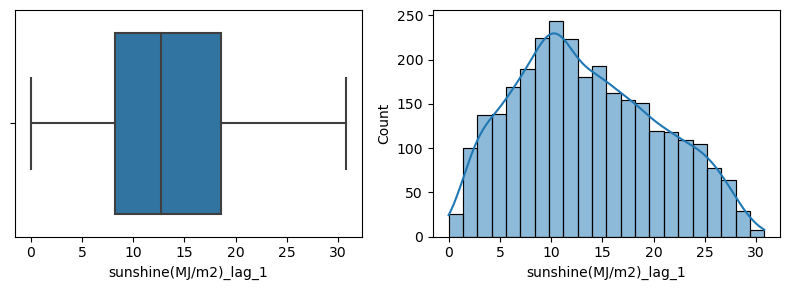

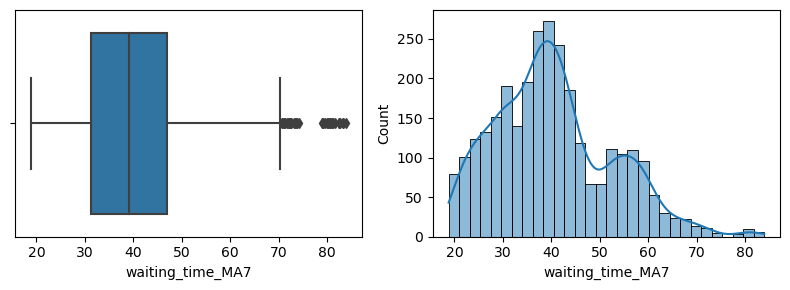

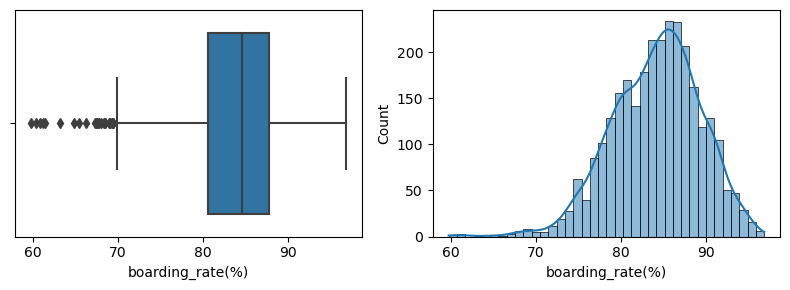

In [63]:
for col in num_cols:
    num_plot(col, df)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

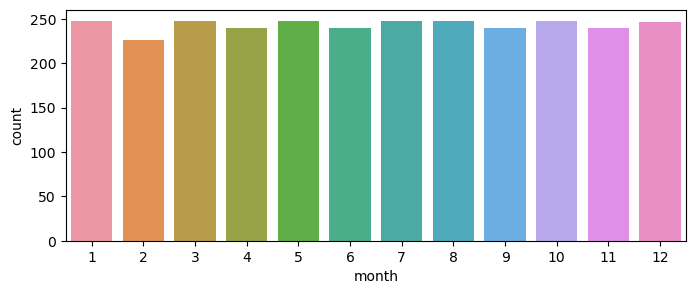

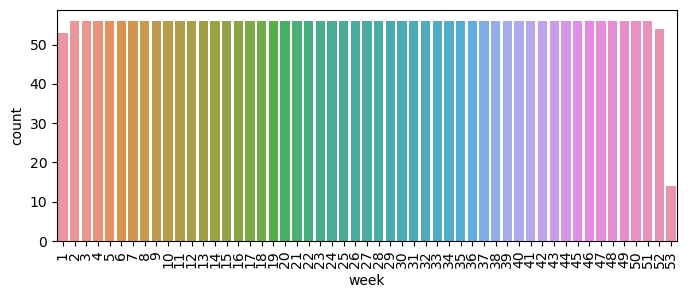

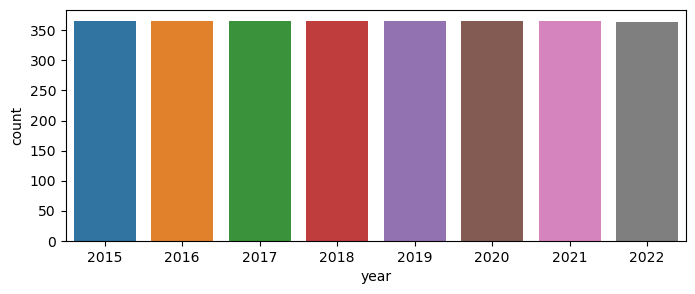

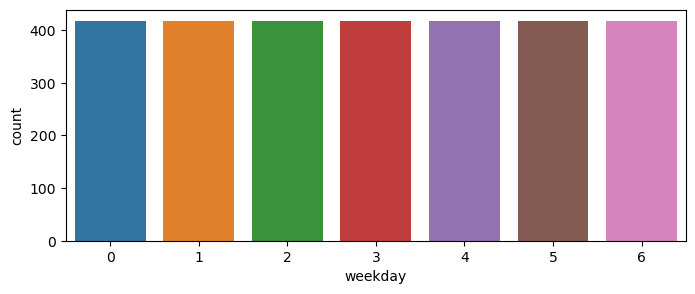

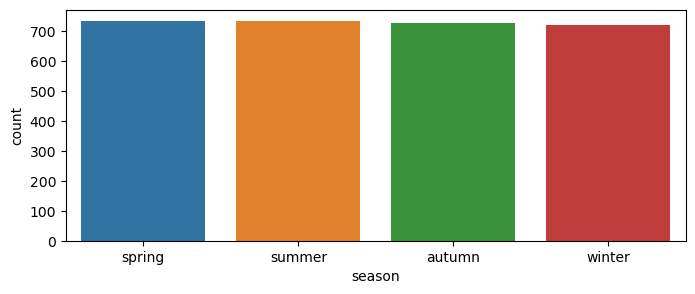

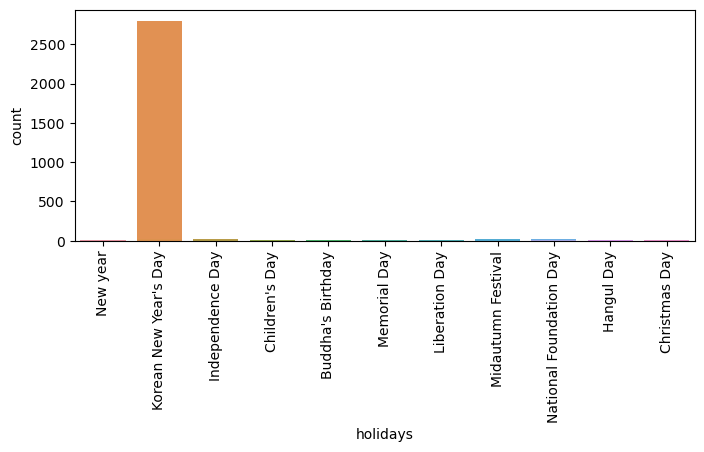

In [81]:
for col in cat_cols:
    cat_plot(col, df)

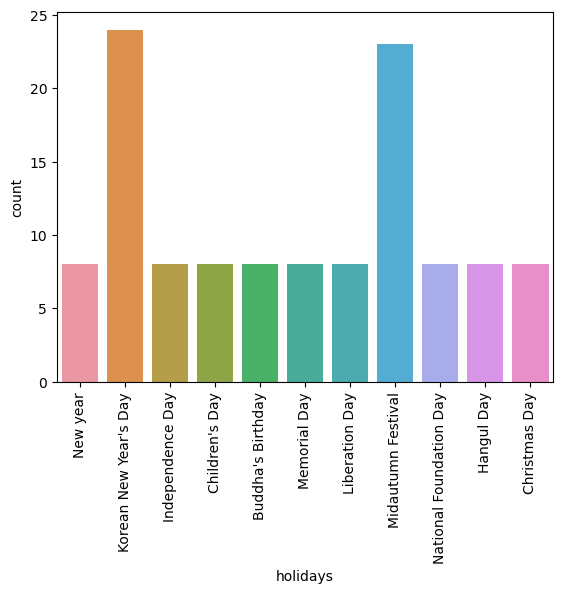

In [84]:
a = df.loc[df['holidays']!=0]
sns.countplot(x='holidays', data=a)
plt.xticks(rotation=90)
plt.show()  

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [85]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_14708\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,week,year,target,temp_max_lag1,temp_min_lag1,rain(mm)_lag_1,humidity_max(%)_lag_1,humidity_min(%)_lag_1,sunshine(MJ/m2)_lag_1,waiting_time_MA7,boarding_rate(%)
car_cnt,1.000000,0.885836,0.904627,0.035641,-0.844823,-0.857811,0.129258,0.243509,0.087627,0.108709,0.109642,0.002522,0.048723,0.087955,0.076322,-0.066471,-0.028648
request_cnt,0.885836,1.000000,0.988746,0.291783,-0.850456,-0.847874,0.083172,0.001235,0.316181,0.058275,0.054250,-0.012944,-0.014331,-0.000850,0.024185,0.188047,-0.251623
ride_cnt,0.904627,0.988746,1.000000,0.184201,-0.868074,-0.858747,0.055190,0.001355,0.229127,0.064615,0.058540,-0.015894,-0.008583,0.005979,0.040210,0.081175,-0.117879
waiting_time,0.035641,0.291783,0.184201,1.000000,0.020279,-0.013169,0.275877,-0.125793,0.732299,0.040863,0.034330,-0.005741,-0.040792,-0.087113,-0.044288,0.842551,-0.770444
fare,-0.844823,-0.850456,-0.868074,0.020279,1.000000,0.977569,0.046048,-0.107992,-0.048772,0.083566,0.070480,0.011502,0.020689,-0.035068,0.009283,0.122209,0.008017
distance,-0.857811,-0.847874,-0.858747,-0.013169,0.977569,1.000000,0.030519,-0.217205,-0.083855,0.087728,0.073549,0.004975,0.021414,-0.039683,-0.000227,0.077340,0.048116
week,0.129258,0.083172,0.055190,0.275877,0.046048,0.030519,1.000000,-0.005008,0.271254,0.188952,0.220072,0.040245,0.150017,0.235509,-0.178516,0.323943,-0.191498
year,0.243509,0.001235,0.001355,-0.125793,-0.107992,-0.217205,-0.005008,1.000000,-0.125696,-0.012080,0.006412,0.051888,0.091597,0.167440,0.104429,-0.144702,0.055090
target,0.087627,0.316181,0.229127,0.732299,-0.048772,-0.083855,0.271254,-0.125696,1.000000,0.044556,0.033645,0.028373,-0.036768,-0.092648,-0.042291,0.800043,-0.588790
temp_max_lag1,0.108709,0.058275,0.064615,0.040863,0.083566,0.087728,0.188952,-0.012080,0.044556,1.000000,0.961606,0.116899,0.306681,0.284707,0.475346,0.041835,0.023888


C:\Users\user\AppData\Local\Temp\ipykernel_14708\2384780498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,  fmt=".2f",cmap="crest")


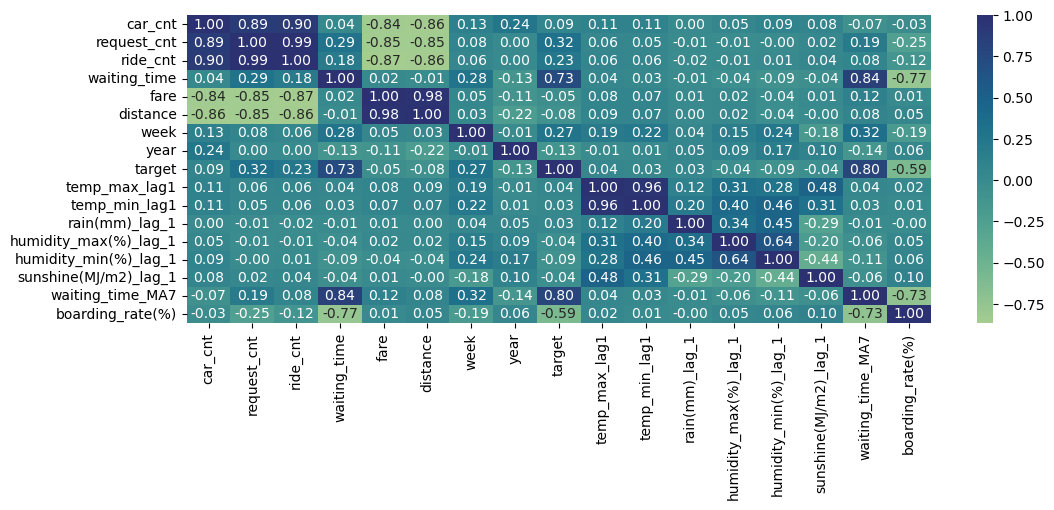

In [98]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True,  fmt=".2f",cmap="crest")
plt.show()

#### 2) 산점도

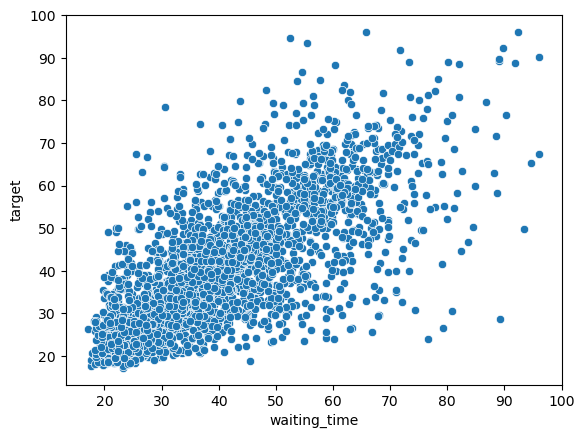

In [89]:
sns.scatterplot(x='waiting_time', y='target', data=df)
plt.show()

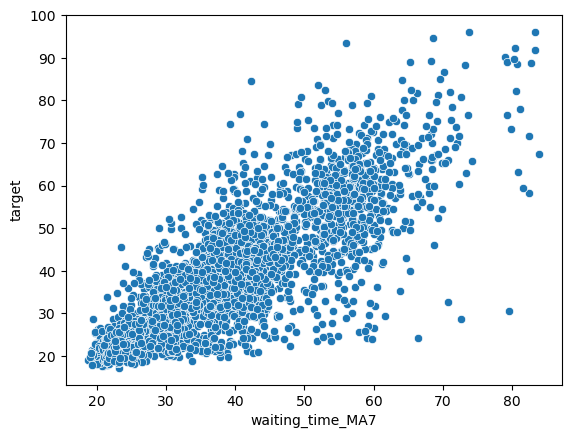

In [90]:
sns.scatterplot(x='waiting_time_MA7', y='target', data=df)
plt.show()

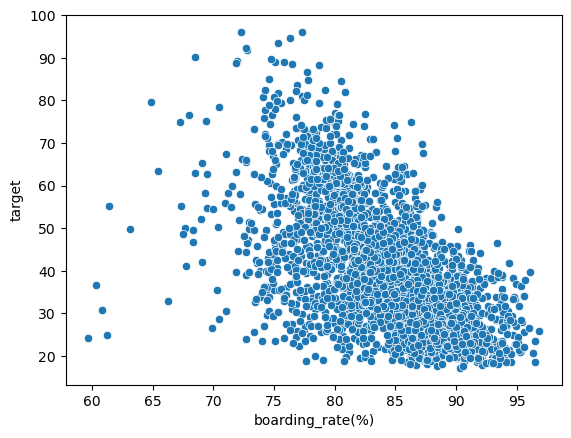

In [91]:
sns.scatterplot(x='boarding_rate(%)', y='target', data=df)
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [92]:
import scipy.stats as spst

In [94]:
p_1 = df.loc[df.season=='spring','target']
p_2 = df.loc[df.season=='summer','target']
p_3 = df.loc[df.season=='autumn','target']
p_4 = df.loc[df.season=='winter','target']
spst.f_oneway(p_1, p_2, p_3, p_4)

F_onewayResult(statistic=35.02524244911058, pvalue=3.116240365654587e-22)

In [96]:
p_1 = df.loc[df.weekday==0,'target']
p_2 = df.loc[df.weekday==1,'target']
p_3 = df.loc[df.weekday==2,'target']
p_4 = df.loc[df.weekday==3,'target']
p_5 = df.loc[df.weekday==4,'target']
p_6 = df.loc[df.weekday==5,'target']
p_7 = df.loc[df.weekday==6,'target']
spst.f_oneway(p_1, p_2, p_3, p_4, p_5, p_6, p_7)

F_onewayResult(statistic=15.709598754374598, pvalue=7.824951103498204e-18)

In [ ]:
## X에서 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

vif = pd.DataFrame()
scaler = StandardScaler()
data = data_full_with_holiday[['car_cnt', 'request_cnt', 'waiting_time','distance', 'rain(mm)','temp_max',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'mean_waiting_time','ride_rate']]
train_x_scaled = scaler.fit_transform(data)
vif["feature"] = data.columns
vif["VIF"] = [variance_inflation_factor(train_x_scaled, i ) for i in range(len(data.columns))]
print(vif[vif["VIF"]<10])
vif[vif["VIF"]<10]

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [ ]:
# 1. 요금 뺀다.
# 2. request, ride 빼고
# 